<a href="https://colab.research.google.com/github/katoyu/image-processing-100training/blob/master/%E7%94%BB%E5%83%8F%E5%87%A6%E7%90%86100%E6%9C%AC%E3%83%8E%E3%83%83%E3%82%AF21_30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!wget https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_11_20/imori_dark.jpg
!wget https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_11_20/imori.jpg
!wget https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_21_30/imori_gamma.jpg
  
from google.colab.patches import cv2_imshow

--2019-04-07 14:27:38--  https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_11_20/imori_dark.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5941 (5.8K) [image/jpeg]
Saving to: ‘imori_dark.jpg’

imori_dark.jpg      100%[===================>]   5.80K  --.-KB/s    in 0s      

2019-04-07 14:27:38 (93.9 MB/s) - ‘imori_dark.jpg’ saved [5941/5941]

--2019-04-07 14:27:40--  https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_11_20/imori.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12638 

#21　ヒストグラム正規化(濃度階調変換)


In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

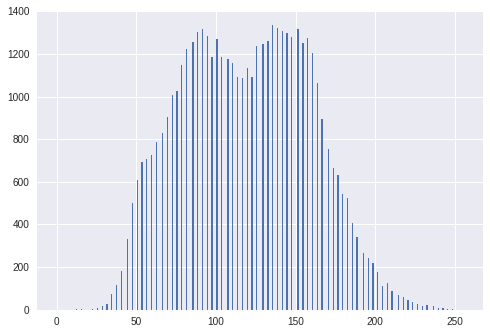

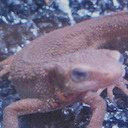

In [5]:
img = cv2.imread("imori_dark.jpg").astype(np.float)
H, W, C = img.shape

#trans [0, 255]
a, b = 0. , 255.

vmin = img.min()
vmax = img.max()

out = img.copy()
out[out < a] = a
out[out > b] = b
out = (b-a) / (vmax - vmin) * (out - vmin) + a
out = out.astype(np.uint8)

plt.hist(out.ravel(), bins=255, rwidth=0.8, range=(0, 255))
plt.savefig("out_his21.jpg")
plt.show()

cv2_imshow(out)

#22 ヒストグラム操作

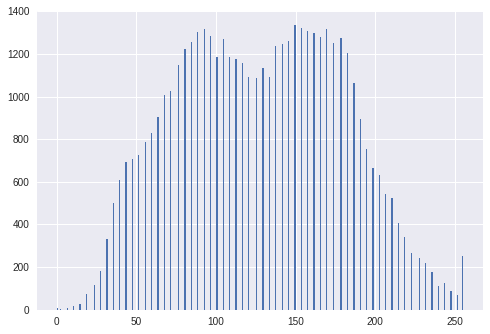

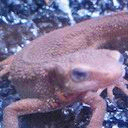

In [6]:
img = cv2.imread("imori_dark.jpg").astype(np.float)
H, W, C = img.shape

#trans[0, 255]
m0 = 128
s0 = 52
m = np.mean(img)
s = np.std(img)

xin = img.copy()
xout = s0 / s * (xin - m) + m0

xout[xout < 0] = 0
xout[xout > 255] = 255
xout = xout.astype(np.uint8)

plt.hist(xout.ravel(), bins=255, rwidth=0.8, range=(0, 255))
plt.savefig("out_his23.jpg")
plt.show()

cv2_imshow(xout)

#23 ヒストグラム平坦化

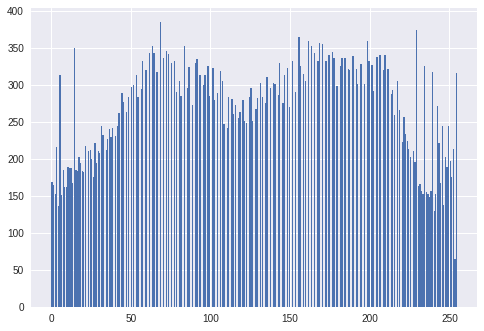

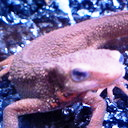

In [7]:
img = cv2.imread("imori.jpg")
H, W, C = img.shape
S = H * W * C * 1.
out = img.copy()

sum_h = 0.
z_max = 255.

for i in range(1, 255):
  ind = np.where(img == i)
  sum_h += len(img[ind])
  z_prime = z_max / S * sum_h
  out[ind] = z_prime
  
out = out.astype(np.uint8)

plt.hist(out.ravel(), bins=255, rwidth=0.8, range=(0, 255))
plt.savefig("out_his23.jpg")
plt.show()

cv2_imshow(out)

#24 ガンマ補正

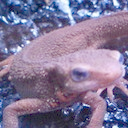

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("imori_gamma.jpg").astype(np.float)

# gamma correction
c = 1.
g = 2.2

out = img.copy()
out /= 255.
out = (1/c * out) ** (1/g) # Iout = (1/c * Iin) ^ (1/g) c=定数, g=ガンマ特性（通常は2.2）

out *= 255
out = out.astype(np.uint8)

cv2_imshow(out)

#25 最近傍補間

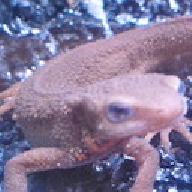

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("imori.jpg").astype(np.float)
H, W, C = img.shape

a = 1.5
aH = int(a * H)
aW = int(a * W)

y = np.arange(aH).repeat(aW).reshape(aW, -1)
x = np.tile(np.arange(aW), (aH, 1))
y = np.round(y / a).astype(np.int)
x = np.round(x / a).astype(np.int)

out = img[y, x]
out = out.astype(np.uint8)

cv2_imshow(out)

#26 Bi-linear補間

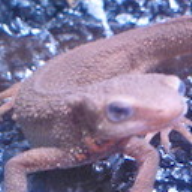

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image
img = cv2.imread("imori.jpg").astype(np.float)
H, W, C = img.shape


# Bi-lenear
a = 1.5
aH = int(a * H)
aW = int(a * W)

y = np.arange(aH).repeat(aW).reshape(aW, -1)
x = np.tile(np.arange(aW), (aH, 1))
y = y / a
x = x / a

ix = np.floor(x).astype(np.int)
iy = np.floor(y).astype(np.int)

ix = np.minimum(ix, W-2)
iy = np.minimum(iy, H-2)

dx = x - ix
dy = y -iy

dx = np.repeat(np.expand_dims(dx, axis=-1), 3, axis=-1)
dy = np.repeat(np.expand_dims(dy, axis=-1), 3, axis=-1)

out = (1 - dx) * (1 - dy) * img[iy, ix] + dx * (1 - dy) * img[iy, ix+1] + (1 - dx) * dy * img[iy+1, ix] + dx * dy * img[iy+1, ix+1]

out[out>255] = 255
out = out.astype(np.uint8)

cv2_imshow(out)

#27 Bi-cubic補間 

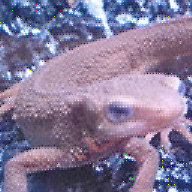

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image
img = cv2.imread("imori.jpg").astype(np.float)
H, W, C = img.shape


# Bi-cubic
a = 1.5
aH = int(a * H)
aW = int(a * W)

y = np.arange(aH).repeat(aW).reshape(aW, -1)
x = np.tile(np.arange(aW), (aH, 1))
y = (y / a)
x = (x / a)

ix = np.floor(x).astype(np.int)
iy = np.floor(y).astype(np.int)

ix = np.minimum(ix, W-1)
iy = np.minimum(iy, H-1)

dx2 = x - ix
dy2 = y - iy
dx1 = dx2 + 1
dy1 = dy2 + 1
dx3 = 1 - dx2
dy3 = 1 - dy2
dx4 = 1 + dx3
dy4 = 1 + dy3

dxs = [dx1, dx2, dx3, dx4]
dys = [dy1, dy2, dx3, dy4]

def weight(t):
  a = -1.
  at = np.abs(t)
  w = np.zeros_like(t)
  ind = np.where(at <= 1)
  w[ind] = ((a+2) * np.power(at, 3) - (a+3) * np.power(at, 2) + 1)[ind]
  ind = np.where((at > 1) & (at <= 2))
  w[ind] = (a*np.power(at, 3) - 5*a*np.power(at, 2) + 8*a*at - 4*a)[ind]
  return w
  
w_sum = np.zeros((aH, aW, C), dtype=np.float32)
out = np.zeros((aH, aW, C), dtype=np.float32)
  
for j in range(-1, 3):
  for i in range(-1, 3):
    ind_x = np.minimum(np.maximum(ix + i, 0), W-1)
    ind_y = np.minimum(np.maximum(iy + j, 0), H-1)

    wx = weight(dxs[i+1])
    wy = weight(dys[j+1])
    wx = np.repeat(np.expand_dims(wx, axis=-1), 3, axis=-1)
    wy = np.repeat(np.expand_dims(wy, axis=-1), 3, axis=-1)
    
    w_sum += wx * wy
    out  += wx * wy * img[ind_y, ind_x]
    
out /= w_sum
out[out>255] = 255
out = out.astype(np.uint8)

cv2_imshow(out)

例だとこうなる⬇️

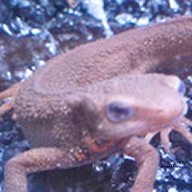

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image
img = cv2.imread("imori.jpg").astype(np.float32)
H, W, C = img.shape


# Bi-cubic
a = 1.5
aH = int(a * H)
aW = int(a * W)

y = np.arange(aH).repeat(aW).reshape(aW, -1)
x = np.tile(np.arange(aW), (aH, 1))
y = (y / a)
x = (x / a)

ix = np.floor(x).astype(np.int)
iy = np.floor(y).astype(np.int)

ix = np.minimum(ix, W-1)
iy = np.minimum(iy, H-1)

dx2 = x - ix
dy2 = y - iy
dx1 = dx2 + 1
dy1 = dy2 + 1
dx3 = 1 - dx2
dy3 = 1 - dy2
dx4 = 1 + dx3
dy4 = 1 + dy3

dxs = [dx1, dx2, dx3, dx4]
dys = [dy1, dy2, dy3, dy4]

def weight(t):
    a = -1.
    at = np.abs(t)
    w = np.zeros_like(t)
    ind = np.where(at <= 1)
    w[ind] = ((a+2) * np.power(at, 3) - (a+3) * np.power(at, 2) + 1)[ind]
    ind = np.where((at > 1) & (at <= 2))
    w[ind] = (a*np.power(at, 3) - 5*a*np.power(at, 2) + 8*a*at - 4*a)[ind]
    return w

w_sum = np.zeros((aH, aW, C), dtype=np.float32)
out = np.zeros((aH, aW, C), dtype=np.float32)

for j in range(-1, 3):
    for i in range(-1, 3):
        ind_x = np.minimum(np.maximum(ix + i, 0), W-1)
        ind_y = np.minimum(np.maximum(iy + j, 0), H-1)

        wx = weight(dxs[i+1])
        wy = weight(dys[j+1])
        wx = np.repeat(np.expand_dims(wx, axis=-1), 3, axis=-1)
        wy = np.repeat(np.expand_dims(wy, axis=-1), 3, axis=-1)

        w_sum += wx * wy
        out += wx * wy * img[ind_y, ind_x]

out /= w_sum
out[out>255] = 255
out = out.astype(np.uint8)

# Save result
cv2_imshow(out)


#28 アフィン変換　平行移動

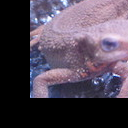

In [27]:
import cv2
import numpy as np
import matplotlib as plt

img = cv2.imread("imori.jpg").astype(np.float32)

H, W, C = img.shape

#affine
a = 1.
b = 0.
c = 0.
d = 1.
tx = 30
ty = -30

y = np.arange(H).repeat(W).reshape(W, -1)
x = np.tile(np.arange(W), (H, 1))

out = np.zeros((H+1, W+1, C), dtype=np.float32)
x_new = a * x + b * y + tx
y_new = c * x + d * y + ty

x_new = np.minimum(np.maximum(x_new, 0), W).astype(np.int)
y_new = np.minimum(np.maximum(y_new, 0), H).astype(np.int)

out[y_new, x_new] = img[y, x]
out = out[:H, :W]
out = out.astype(np.uint8)

cv2_imshow(out)

#29 アフィン変換　拡大縮小

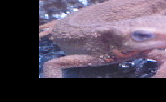

In [33]:
import cv2
import numpy as np
import matplotlib as plt
 
_img = cv2.imread("imori.jpg").astype(np.float32)

H, W, C = _img.shape

#affine
a = 1.3
b = 0.
c = 0.
d = 0.8
tx = 30
ty = -30

img = np.zeros((H+2, W+2, C), dtype=np.float32)
img[1:H+1, 1:W+1] = _img.copy()

H_new = np.round(H * d).astype(np.int)
W_new = np.round(W * a).astype(np.int)
out = np.zeros((H_new+1, W_new+1, C), dtype=np.float32)

x_new = np.tile(np.arange(W_new), (H_new, 1))
y_new = np.arange(H_new).repeat(W_new).reshape(H_new, -1)

adbc = a * d - b * c
x = np.round((d * x_new - b  *y_new) / adbc).astype(np.int) - tx  + 1
y = np.round((-c * x_new + a * y_new) / adbc).astype(np.int) - ty + 1

x = np.minimum(np.maximum(x, 0), W+1).astype(np.int)
y = np.minimum(np.maximum(y, 0), H+1).astype(np.int)
out[y_new, x_new] = img[y, x]

out = out[:H_new, :W_new]
out = out.astype(np.uint8)

cv2_imshow(out)

#30 アフィン変換　回転

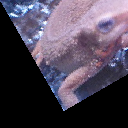

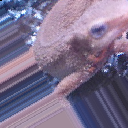

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

_img = cv2.imread("imori.jpg").astype(np.float32)
H, W, C = _img.shape

#affine
A = 30.
theta = -A * np.pi / 180. 
a = np.cos(theta)
b = -np.sin(theta)
c = np.sin(theta)
d = np.cos(theta)
tx = 0
ty = 0

img = np.zeros((H+2, W+2, C), dtype=np.float32)
img[1:H+1, 1:W+1] = _img

H_new = np.round(H).astype(np.int)
W_new = np.round(W).astype(np.int)
out = np.zeros((H_new, W_new, C), dtype=np.float32)

x_new = np.tile(np.arange(W_new), (H_new, 1))
y_new = np.arange(H_new).repeat(W_new).reshape(H_new, -1)

adbc = a * d - b * c
x = np.round((d * x_new - b * y_new) / adbc).astype(np.int) - tx + 1
y = np.round((-c * x_new + a * y_new) / adbc).astype(np.int) - ty + 1

x = np.minimum(np.maximum(x, 0), W+1).astype(np.int)
y = np.minimum(np.maximum(y, 0), H+1).astype(np.int)

out[y_new, x_new] = img[y, x]
out = out.astype(np.uint8)

cv2_imshow(out)

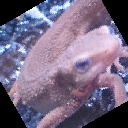

In [39]:
_img = cv2.imread("imori.jpg").astype(np.float32)
H, W, C = _img.shape


# Affine
A = 30.
theta = - np.pi * A / 180.

a = np.cos(theta)
b = -np.sin(theta)
c = np.sin(theta)
d = np.cos(theta)
tx = 0
ty = 0

img = np.zeros((H+2, W+2, C), dtype=np.float32)
img[1:H+1, 1:W+1] = _img

H_new = np.round(H).astype(np.int)
W_new = np.round(W).astype(np.int)
out = np.zeros((H_new, W_new, C), dtype=np.float32)

x_new = np.tile(np.arange(W_new), (H_new, 1))
y_new = np.arange(H_new).repeat(W_new).reshape(H_new, -1)

adbc = a * d - b * c
x = np.round((d * x_new  - b * y_new) / adbc).astype(np.int) - tx + 1
y = np.round((-c * x_new + a * y_new) / adbc).astype(np.int) - ty + 1

dcx = (x.max() + x.min()) // 2 - W // 2
dcy = (y.max() + y.min()) // 2 - H // 2

x -= dcx
y -= dcy
x = np.minimum(np.maximum(x, 0), W+1).astype(np.int)
y = np.minimum(np.maximum(y, 0), H+1).astype(np.int)

out[y_new, x_new] = img[y, x]
out = out.astype(np.uint8)

cv2_imshow(out)